# Bangalore traffic prediction and analysis

## *Project Objectives :*

 - To analyze traffic patterns in Bangalore using real-world traffic data.
 - To predict traffic congestion levels (Low / Medium / High) based on demand, capacity, disruptions, and temporal factors
 - To identify and explain the key factors that contribute to traffic congestion

## (A) Data loading :


In [1]:
import pandas as pd
dataset = pd.read_csv('bangalore_traffic_daily.csv')
dataset

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8931,2024-08-09,Electronic City,Hosur Road,11387,23.440276,1.262384,35.871483,57.354487,1,72.774,21.523289,83.530352,97.898279,211,Fog,No
8932,2024-08-09,M.G. Road,Trinity Circle,36477,45.168429,1.500000,100.000000,100.000000,3,122.954,29.822312,60.738488,60.355967,95,Clear,No
8933,2024-08-09,M.G. Road,Anil Kumble Circle,42822,22.028609,1.500000,100.000000,100.000000,1,135.644,43.185905,85.321627,61.333731,110,Clear,No
8934,2024-08-09,Jayanagar,South End Circle,20540,52.254798,1.020520,72.639152,97.845527,2,91.080,44.416043,89.586947,79.197198,94,Clear,No


### Dataset description :
#### This dataset contains daily traffic observations from Bangalore, recorded across major roads and intersections between January 2022 and August 2024.
#### Each record represents traffic conditions for a specific road on a given day and includes information related to traffic demand, road capacity, disruptions, environmental conditions, and commuter behavior.

## (B) Data cleaning and validation

In [2]:
dataset.shape


(8936, 16)

In [3]:
dataset.dtypes


Date                                   object
Area Name                              object
Road/Intersection Name                 object
Traffic Volume                          int64
Average Speed                         float64
Travel Time Index                     float64
Congestion Level                      float64
Road Capacity Utilization             float64
Incident Reports                        int64
Environmental Impact                  float64
Public Transport Usage                float64
Traffic Signal Compliance             float64
Parking Usage                         float64
Pedestrian and Cyclist Count            int64
Weather Conditions                     object
Roadwork and Construction Activity     object
dtype: object

#### 1. Converting date feature from obj to datetime type

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.dtypes

Date                                  datetime64[ns]
Area Name                                     object
Road/Intersection Name                        object
Traffic Volume                                 int64
Average Speed                                float64
Travel Time Index                            float64
Congestion Level                             float64
Road Capacity Utilization                    float64
Incident Reports                               int64
Environmental Impact                         float64
Public Transport Usage                       float64
Traffic Signal Compliance                    float64
Parking Usage                                float64
Pedestrian and Cyclist Count                   int64
Weather Conditions                            object
Roadwork and Construction Activity            object
dtype: object

#### 2. Checking for inacurate ranges of date :

In [5]:
dataset['Date'].describe()

count                             8936
mean     2023-04-22 05:25:11.548791552
min                2022-01-01 00:00:00
25%                2022-08-26 00:00:00
50%                2023-04-24 00:00:00
75%                2023-12-17 06:00:00
max                2024-08-09 00:00:00
Name: Date, dtype: object

#### 3. Checking for exactly duplicate rows :

In [6]:
dataset.duplicated().sum()


np.int64(0)

#### 4. Checked for missing values in all columns

In [7]:
dataset.isna().sum()


Date                                  0
Area Name                             0
Road/Intersection Name                0
Traffic Volume                        0
Average Speed                         0
Travel Time Index                     0
Congestion Level                      0
Road Capacity Utilization             0
Incident Reports                      0
Environmental Impact                  0
Public Transport Usage                0
Traffic Signal Compliance             0
Parking Usage                         0
Pedestrian and Cyclist Count          0
Weather Conditions                    0
Roadwork and Construction Activity    0
dtype: int64

#### 5. Checking duplicate entries for same roads on same day :

In [8]:
dataset.duplicated(subset=['Date', 'Road/Intersection Name']).sum()


np.int64(0)

#### 6. Checking unique values for object type features :

In [9]:
dataset.select_dtypes(include='object').nunique()


Area Name                              8
Road/Intersection Name                16
Weather Conditions                     5
Roadwork and Construction Activity     2
dtype: int64

#### 7. Checking for unusual values of parameters : 

In [10]:
(dataset['Traffic Volume'] > 100000).sum()


np.int64(0)

In [11]:
(dataset['Road Capacity Utilization'] > 100).sum()


np.int64(0)

In [12]:
(dataset['Average Speed'] > 120).sum()

np.int64(0)

#### 8. Checking for negative values in numeric type parameters :

In [13]:
(dataset.select_dtypes(include='number') < 0).sum()


Traffic Volume                  0
Average Speed                   0
Travel Time Index               0
Congestion Level                0
Road Capacity Utilization       0
Incident Reports                0
Environmental Impact            0
Public Transport Usage          0
Traffic Signal Compliance       0
Parking Usage                   0
Pedestrian and Cyclist Count    0
dtype: int64

#### 9. Standardizing categorical text :

In [14]:
cat_cols = dataset.select_dtypes(include='object').columns
# Stripping trailing and leading whitespaces
dataset[cat_cols] = dataset[cat_cols].apply(lambda col: col.str.strip())

# Lower casing every object type value
dataset[cat_cols] = dataset[cat_cols].apply(lambda col: col.str.lower())

dataset[cat_cols]

,Area Name,Road/Intersection Name,Weather Conditions,Roadwork and Construction Activity
0,indiranagar,100 feet road,clear,no
1,indiranagar,cmh road,clear,no
2,whitefield,marathahalli bridge,clear,no
3,koramangala,sony world junction,clear,no
4,koramangala,sarjapur road,clear,no
...,...,...,...,...
8931,electronic city,hosur road,fog,no
8932,m.g. road,trinity circle,clear,no
8933,m.g. road,anil kumble circle,clear,no
8934,jayanagar,south end circle,clear,no


## (C) Feature engineering 

#### 1. Extracting day of week using dates :

In [15]:
dataset['day_of_week'] = dataset['Date'].dt.dayofweek
dataset['day_of_week']
# 0-6 : Monday-Sunday


0       5
1       5
2       5
3       5
4       5
       ..
8931    4
8932    4
8933    4
8934    4
8935    4
Name: day_of_week, Length: 8936, dtype: int32

#### 2. Creating binary flag for weekday/weekend  :

In [16]:
dataset['is_weekend'] = dataset['day_of_week'].isin([5, 6]).astype(int)
dataset['is_weekend']


0       1
1       1
2       1
3       1
4       1
       ..
8931    0
8932    0
8933    0
8934    0
8935    0
Name: is_weekend, Length: 8936, dtype: int64

#### 3. Creating binary flag for incidents :

In [17]:
dataset['has_incident'] = (dataset['Incident Reports'] > 0).astype(int)
dataset['has_incident']


0       0
1       1
2       0
3       1
4       1
       ..
8931    1
8932    1
8933    1
8934    1
8935    1
Name: has_incident, Length: 8936, dtype: int64

#### 4. Creating binary flag for roadwork :

In [18]:
dataset['has_roadwork'] = dataset['Roadwork and Construction Activity'].map({'yes':1, 'no':0})
dataset['has_roadwork']

0       0
1       0
2       0
3       0
4       0
       ..
8931    0
8932    0
8933    0
8934    0
8935    0
Name: has_roadwork, Length: 8936, dtype: int64

#### 5. Creating feature for prominent festivals of the city ( Dates within dataset range for festivals like Diwali, Dushehra, Ganesh Chaturthi, Ugadi, etc.) :

In [19]:
dataset['is_festival'] = 0
# Dates within dataset range for festivals like Diwali, Dushehra, Ganesh Chaturthi, Ugadi, etc.
dates = [
    '2022-01-26', '2022-04-02', '2022-05-01', '2022-05-03',
    '2022-07-10', '2022-08-15', '2022-08-31', '2022-10-05',
    '2022-10-24', '2022-12-25',
    '2023-01-26', '2023-03-22', '2023-04-22', '2023-05-01',
    '2023-06-29', '2023-08-15', '2023-09-19', '2023-10-24',
    '2023-11-12', '2023-12-25',
    '2024-01-26', '2024-04-09', '2024-04-11', '2024-05-01',
    '2024-06-17'
]
dates = pd.to_datetime(dates)
dataset.loc[dataset['Date'].isin(dates),'is_festival']=1



#### 6. Creating binary flag for holidays :

In [20]:
dataset['is_holiday'] = ((dataset['is_weekend'] == 1) |
                         (dataset['is_festival']==1) 
                        ).astype(int)

#### 7. Reducing number of categories from weather feature :

In [21]:
dataset['Weather Conditions'].unique()

array(['clear', 'overcast', 'fog', 'rain', 'windy'], dtype=object)

In [22]:
weather_map = {
    'clear': 'clear',
    'overcast': 'clear',
    'windy': 'clear',
    'rain': 'rain',
    'fog': 'fog'
}

dataset['weather_group'] = dataset['Weather Conditions'].map(weather_map)
dataset['weather_group'].unique()


array(['clear', 'fog', 'rain'], dtype=object)

## (D) Target definition

#### 1. Obtaining statistical and histogram data for target :

In [23]:
dataset['Congestion Level'].describe()

count    8936.000000
mean       80.818041
std        23.533182
min         5.160279
25%        64.292905
50%        92.389018
75%       100.000000
max       100.000000
Name: Congestion Level, dtype: float64

<Axes: >

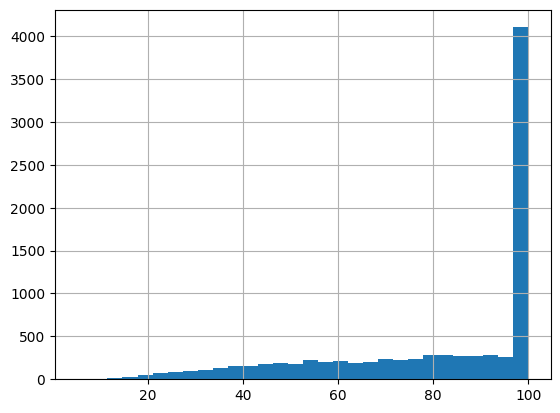

In [24]:
dataset['Congestion Level'].hist(bins=30)

**Target Analysis:** Above histogram shows that the congestion level distribution is highly skewed, with a large concentration of values near the upper bound (around 100). This indicates that high congestion conditions dominate the dataset, motivating the use of categorical congestion levels to focus on traffic states rather than precise numeric values. Thus : 

 - **Target Choice :** Multiclass classification
 - **Reason :** Traffic congestion exhibits class and threshhold behavior. Class outputs                 helps in making definite decision making.
 - **Goal :** Predict operational traffic state (High/Med/Low), not numeric values.


#### 2. Creating bins as High/Med/Low for congestion levels.

In [25]:
low_thresh = 60 
high_thresh = 90

def create_bins(x):
    if x < 60 :
        return 0 # Low level bin
    elif x < 90 :
        return 1 # Med level bin
    else :
        return 2 # High level bin

dataset['Congestion Bin'] = dataset['Congestion Level'].apply(create_bins)

dataset['Congestion Bin']
        

0       2
1       2
2       0
3       2
4       2
       ..
8931    0
8932    2
8933    2
8934    1
8935    0
Name: Congestion Bin, Length: 8936, dtype: int64


 **Reason of selected bin limits :**
 - Congestion data shows high frequency of data at higher congestion levels( 80 - 100 )
 - This resembles real urban traffic 



#### 3. Sanity check for expected class size of each bin :

In [26]:
dataset['Congestion Bin'].value_counts(normalize=True)

Congestion Bin
2    0.523165
1    0.258953
0    0.217883
Name: proportion, dtype: float64

## (E) Feature - Target sanity validation

#### **Objective:** 
 - To verify whether engineered categorical features exhibit logical and consistent relationships with the target variable (Congestion Bin) after binning the continuous congestion score.
 - The analysis uses row-normalized contingency tables to compare conditional congestion distributions across feature categories.

In [27]:
pd.crosstab(
    dataset['day_of_week'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
day_of_week,,,
0,0.206019,0.269290,0.524691
1,0.224599,0.268144,0.507257
2,0.206951,0.257504,0.535545
3,0.217600,0.244800,0.537600
4,0.234637,0.255387,0.509976
5,0.219380,0.270543,0.510078
6,0.216195,0.246069,0.537736


#### 1. Weekend vs Congestion 

In [28]:
pd.crosstab(
    dataset['is_weekend'],
    dataset['Congestion Bin'],
    normalize = 'index'
)
    

Congestion Bin,0,1,2
is_weekend,,,
0,0.217917,0.259178,0.522906
1,0.217799,0.258392,0.523810


#### 2. Roadwork vs Congestion

In [29]:
pd.crosstab(
    dataset['has_roadwork'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
has_roadwork,,,
0,0.216290,0.261857,0.521852
1,0.232426,0.232426,0.535147


#### 3. Festival vs Congestion 

In [30]:
pd.crosstab(
    dataset['is_festival'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
is_festival,,,
0,0.217476,0.258468,0.524056
1,0.233480,0.277533,0.488987


#### 4. Weather vs Congestion

In [31]:
pd.crosstab(
    dataset['weather_group'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
weather_group,,,
clear,0.217622,0.261818,0.520559
fog,0.205422,0.258603,0.535975
rain,0.234583,0.234583,0.530834


#### 5. Incident vs Congestion

In [32]:
pd.crosstab(
    dataset['has_incident'],
    dataset['Congestion Bin'],
    normalize = 'index'
)

Congestion Bin,0,1,2
has_incident,,,
0,0.473947,0.248854,0.277199
1,0.123910,0.262659,0.613431


 **Conclusion :** 
 - The target binning preserves logical and consistent feature–target relationships.
 - Traffic incidents show the strongest impact, with a clear shift toward high congestion → best predictive feature.
 - Roadwork, weather, and festivals have moderate impact and act as contextual amplifiers.
 - Day of week and weekend have weak influence and mainly provide background temporal context.
 - No feature exhibits contradictory behavior, confirming target sanitation quality.

        

## (F) Feature selection :


 **Objective**
- Select features that explain congestion using **observable traffic and contextual signals**, while **excluding labeled variables and high-cardinality identifiers (road and area names)** to prevent memorization and promote generalizable, data-driven learning.


In [33]:
dataset.columns

Index(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact',
       'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity', 'day_of_week', 'is_weekend',
       'has_incident', 'has_roadwork', 'is_festival', 'is_holiday',
       'weather_group', 'Congestion Bin'],
      dtype='object')

#### 1. Dropping columns with labeled categories :

In [34]:
drop_columns = ['Date',
    'Area Name',
    'Road/Intersection Name',
    'Congestion Level', 'Weather Conditions', 'Roadwork and Construction Activity']

#### 2. Target feature with Y table :

In [35]:
x = dataset.drop( columns = drop_columns + ['Congestion Bin'] )
y = dataset['Congestion Bin']

In [36]:
x.shape, y.shape

((8936, 17), (8936,))

## (G) Train/Test splits

#### 1. Splitting data into training-testing splits with 20-80 ratio :

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)


#### 2. Sanity check for train-test set ( looking for equal distribution of classes ) :

In [38]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Congestion Bin
2    0.523223
1    0.258954
0    0.217823
Name: proportion, dtype: float64
Congestion Bin
2    0.522931
1    0.258949
0    0.218121
Name: proportion, dtype: float64


## (H) Baseline model training :

#### Objective :
 - To create a standard reference point of model performance
 - We create 2 baselines : A. Logistic Regression   B. Shallow Decision Tree


### MODEL A: Logistic Regression Model

#### Encoding categorical values 


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

#### 1. Defining feature groups - categorical and numerical 

In [40]:
categorical_cols = ['weather_group','day_of_week']
numerical_cols = [ c for c in x.columns if c not in categorical_cols]

#### 2. Building transformer

In [41]:
preprocessor = ColumnTransformer(
    transformers = [
    ('cat_transformed', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_cols),
    ('num_transformed', 'passthrough', numerical_cols)
    ]
)

#### 3. Creating logistic regression pipeline:


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [43]:
LogRegPipeline = Pipeline(
    steps = [
        ('preprocess',preprocessor),
        ('model',LogisticRegression(
            max_iter = 1000
        ))
    ])

#### 4. Training the logistic model

In [44]:
LogRegPipeline.fit(x_train,y_train)
# Below error is raised because numerical features have different scales and LR is scale sensitive, so its just letting you know that the model didnt reach optimised weights due to iteration limit. 
# Can be fixed by scaling features using standard scaler later. 

C:\Users\Acer\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat_transformed', ...), ('num_transformed', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif

#### 5. Testing and evaluating the model

In [45]:
from sklearn.metrics import classification_report, confusion_matrix

In [46]:
y_pred_LR = LogRegPipeline.predict(x_test)

#### 6. Performance metrics of each class :

In [47]:
print(classification_report(y_test, y_pred_LR, digits = 3))

              precision    recall  f1-score   support

           0      0.923     0.923     0.923       390
           1      0.849     0.836     0.842       463
           2      0.951     0.958     0.955       935

    accuracy                          0.919      1788
   macro avg      0.908     0.906     0.907      1788
weighted avg      0.919     0.919     0.919      1788



#### 7. Confusion matrix : 

In [48]:
confusion_matrix(y_test,y_pred_LR)

array([[360,  30,   0],
       [ 30, 387,  46],
       [  0,  39, 896]])

 - Above confusion matrix shows how many low/med/high points were classified as low/med/high results.
 - Ex: array[0][0] denotes 360 low points were classified correctly as low, array[0][1] denotes 30 low points were classified as med.

### MODEL B: Shallow Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier


#### 1. Creating Decision Tree pipeline

In [55]:
tree_pipeline = Pipeline(steps = [
    ('preprocess', preprocessor),
    ('model',DecisionTreeClassifier(
    max_depth = 4, # Deliberate small depth to avoid overfitting
    min_samples_leaf = 50,
    random_state = 42
))
])

#### 2. Training decision tree model

In [56]:
tree_pipeline.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat_transformed', ...), ('num_transformed', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the dif

#### 3. Testing and evaluating the model

In [52]:
y_pred_DT = tree_pipeline.predict(x_test)

#### 4. Performance metrics of each class :

In [53]:
print(classification_report(y_test, y_pred_DT, digits=3))

              precision    recall  f1-score   support

           0      0.934     0.900     0.916       390
           1      0.835     0.866     0.850       463
           2      0.960     0.957     0.959       935

    accuracy                          0.921      1788
   macro avg      0.910     0.908     0.909      1788
weighted avg      0.922     0.921     0.921      1788



#### 5. Confusion matrix : 

In [54]:
confusion_matrix(y_test,y_pred_DT)

array([[351,  39,   0],
       [ 25, 401,  37],
       [  0,  40, 895]])


#### Conclusion:
 - Both linear and shallow nonlinear baselines achieve similar performance (macro-F1 ≈ 0.91), indicating that congestion regimes are largely explained by additive effects of operational features, with limited bindicate real error.enefit from simple nonlinear interactions at this granularity.
 - Macro-F1 avg difference -> 0.002
 - Macro F1 avg is Avg of F1 score per class, its better than comparing accuracy as datasets can be class biased, for ex : if high class dominates in dataset and lazy model always predicts high, the accuracy would be high but would not 